# Product Detection (Shopee Code League 2020)

In [16]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 

print(tf.__version__)
ds_path = "./data/train/train"

2.2.0


## Data Exploration

### Read dataset and images

In [5]:
d_train = pd.read_csv("./data/train.csv")

In [6]:
d_train.shape

(105392, 2)

In [7]:
d_train.columns

Index(['filename', 'category'], dtype='object')

In [10]:
category = d_train.category.unique()
category

array([ 3,  4, 32, 35, 34, 33,  5,  2, 20, 18, 27, 11, 29, 16, 28, 17, 10,
       19, 26, 21,  7, 38,  0, 36,  9, 31, 30, 37,  8,  1,  6, 39, 41, 24,
       23, 15, 12, 40, 13, 14, 22, 25])

In [25]:
d_show = d_train.groupby("category", as_index=False).apply(lambda o: o.iloc[0, :])
d_show

,filename,category
0,d415f1f957c8f5d541b6067e3ee35141.jpg,0
1,57b5ce6d315c76099e981a15fa9de23c.jpg,1
2,0511885423e951068d6f4336b427f9a8.jpg,2
3,45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg,3
4,a331709487f8cce9e9be9e8a7ebb88be.jpg,4
5,22499779ffdb38d00da1c9e06be3156a.jpg,5
6,297724e72ee7d04e628f15d3d8932e16.jpg,6
7,6768cf591883d8a9a5fa4677b5dcb7a8.jpg,7
8,ba0ee593962d7619d14c3f02978b79f7.jpg,8
9,402202845e536a4cabb54b0276d09a05.jpg,9


In [27]:
len(d_show)

42

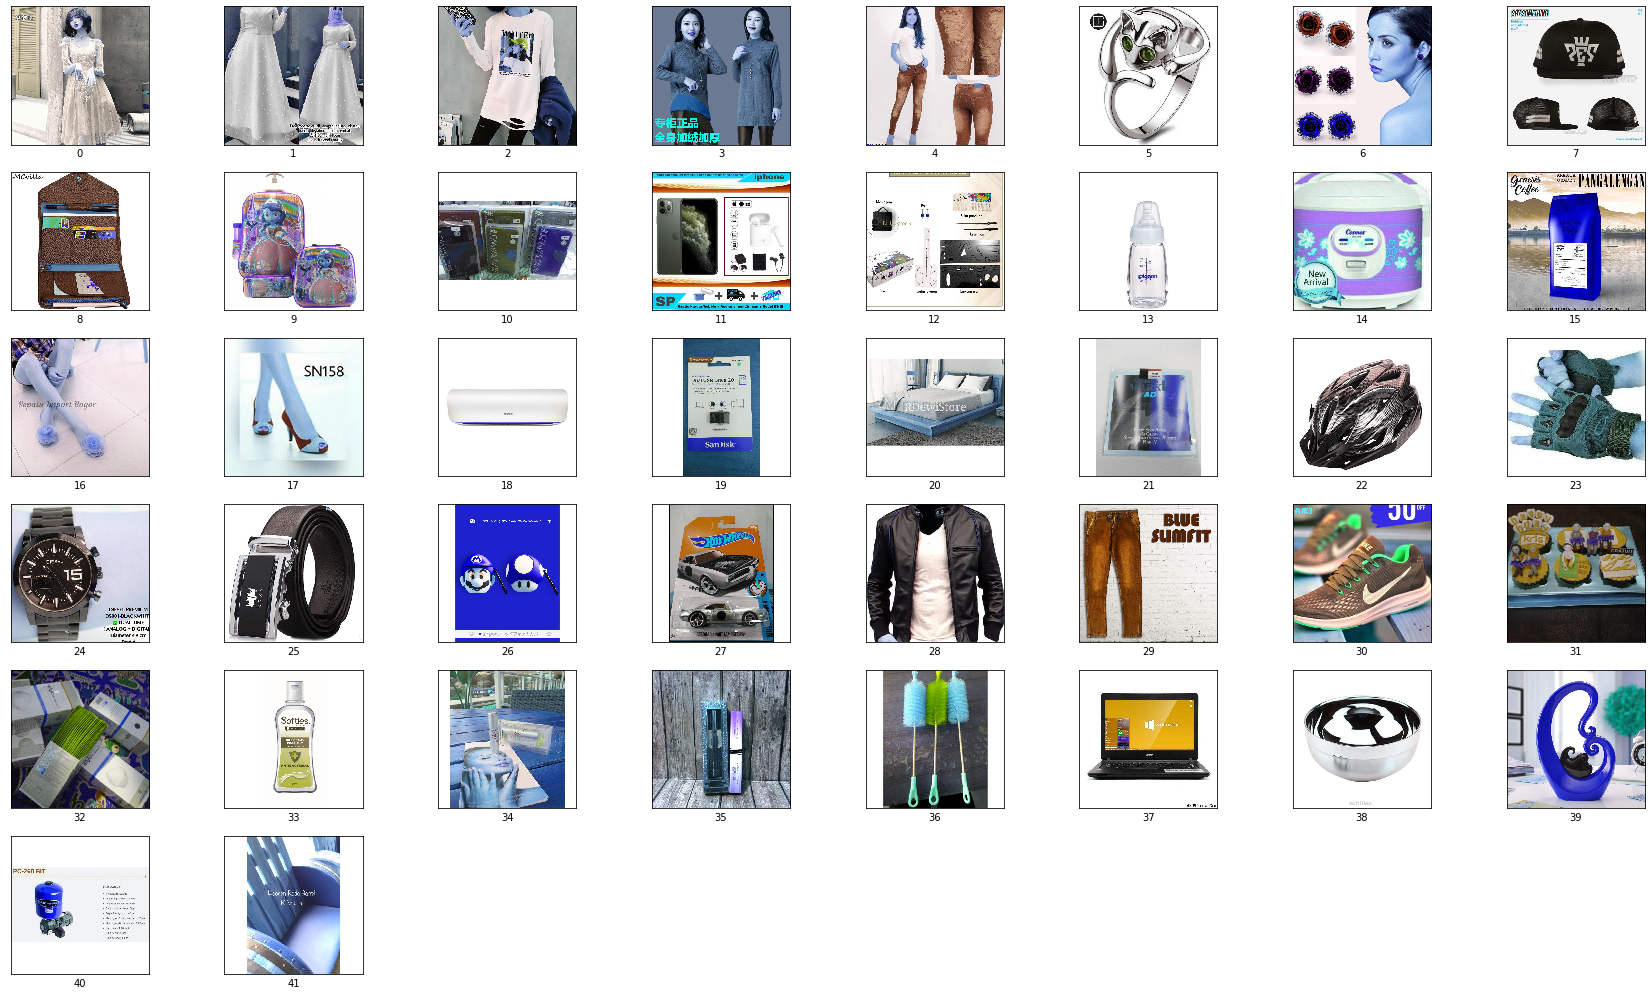

In [35]:
plt.figure(figsize=(30,30))
for i in range(len(d_show)):
    r = d_show.iloc[i]
    plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
  
    path = "%s/%02d/%s" % (ds_path, r.category, r.filename)
    plt.imshow(cv2.imread(path), cmap=plt.cm.binary)
    plt.xlabel(r.category)
plt.show()

In [38]:
d_d = d_train.groupby("category", as_index=False).count()
d_d

,category,filename
0,0,2683
1,1,2702
2,2,2687
3,3,2703
4,4,2703
5,5,2641
6,6,2641
7,7,2660
8,8,2700
9,9,2698


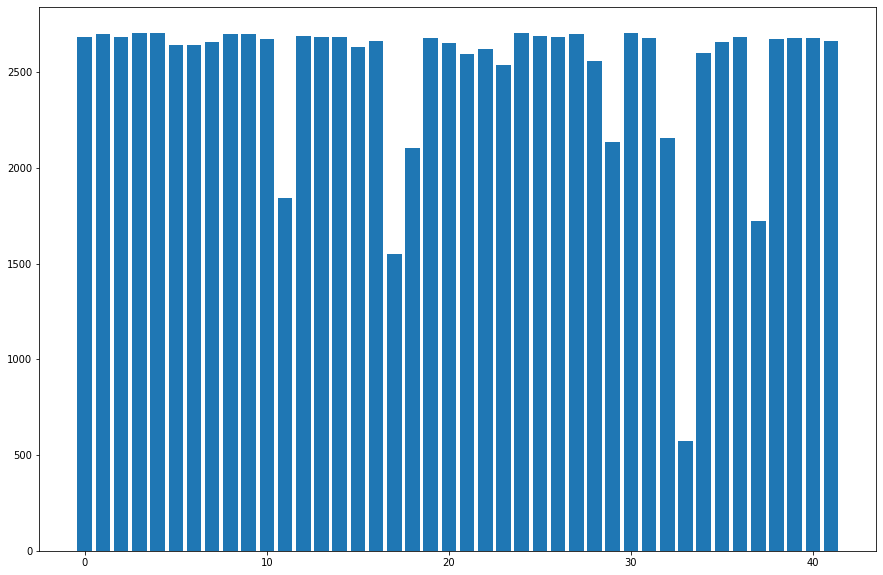

In [44]:
plt.figure(figsize=(15,10))
plt.bar(d_d.category, d_d.filename)
plt.show()